<a href="https://colab.research.google.com/github/valentintesta/Data-Science---Productos-Bancarios/blob/main/Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar Librerias**

In [ ]:
import missingno as mno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from imblearn.combine import SMOTEENN
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# **Dataset**

In [ ]:
pd.read_csv("/content/Bank Customer Churn Prediction.csv")

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
 df_bank = pd.read_csv("/content/Bank Customer Churn Prediction.csv")

In [ ]:
df_bank.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# forma dataset
df_bank.shape


(10000, 12)

In [ ]:
# columnas
df_bank.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [ ]:
# dataset info
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
# datset estadisticas
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [ ]:
df_bank.nunique()


customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

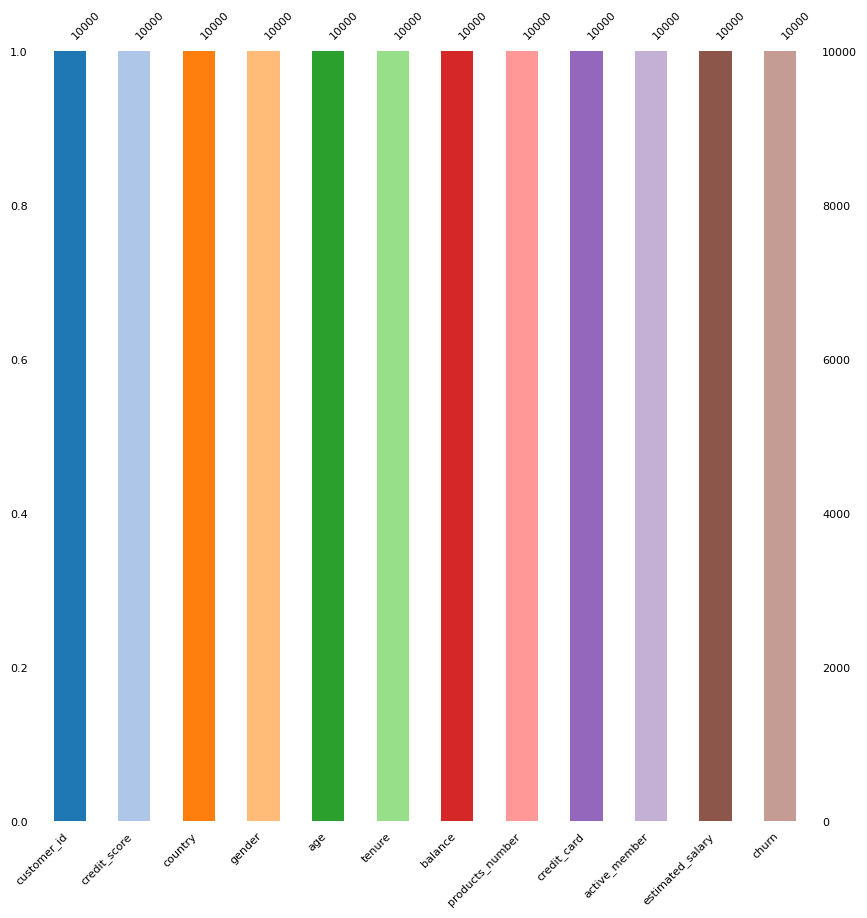

In [ ]:
# visualizaciones de valores faltantes

colors=sns.color_palette("tab20")
mno.bar(df_bank , figsize=(10,10), fontsize=8, color=colors)
plt.show()

El dataset no presenta valores faltantes

In [ ]:
# valores duplicados
df_bank.duplicated().sum()


0

El dataset no presenta valores duplicados

In [ ]:
# Comprobando data imbalance

df_bank['churn'].value_counts()


0    7963
1    2037
Name: churn, dtype: int64

Los datos están muy desequilibrados

# **Analisis Exploratorio de Datos**

In [ ]:
df_cp = df_bank.copy()


In [ ]:
df_cp = df_cp.drop('customer_id',axis=1)
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## **Heatmap: Correlacion**

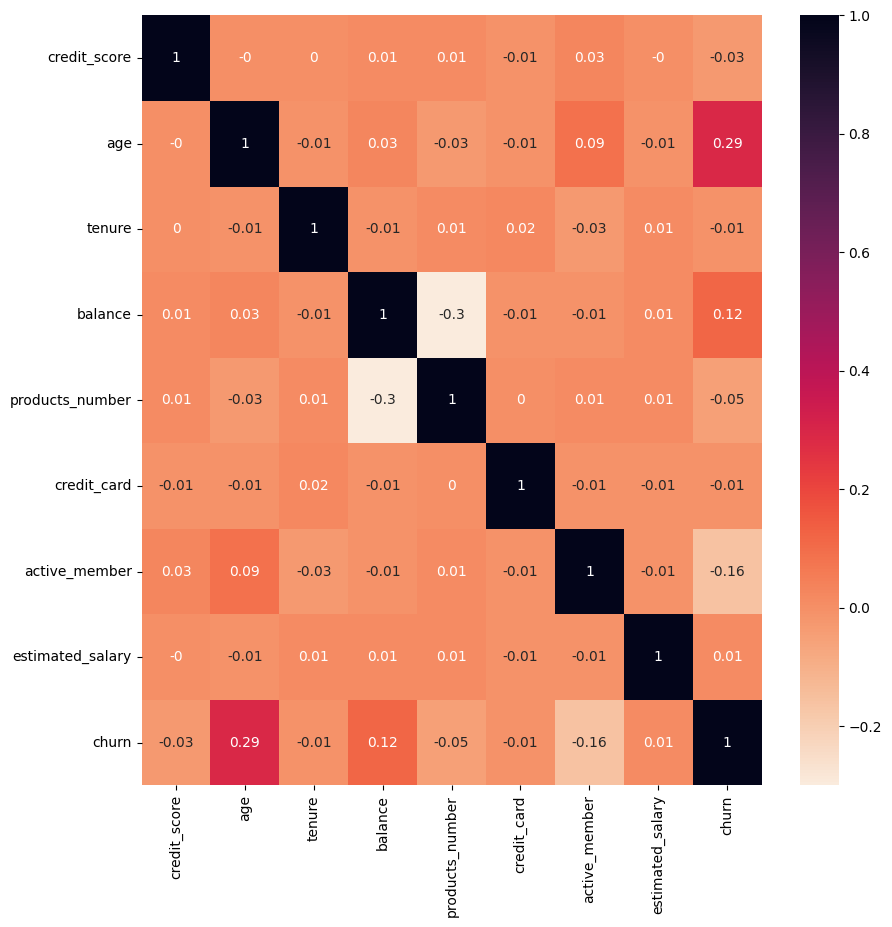

In [ ]:
c_map=sns.color_palette("rocket_r", as_cmap=True)
correlation = df_cp.corr(numeric_only=True).round(2)
plt.figure(figsize = (10,10))
sns.heatmap(correlation, annot = True, cmap = c_map)
plt.show()

In [ ]:
abs(correlation['churn']).sort_values(ascending=False)


churn               1.00
age                 0.29
active_member       0.16
balance             0.12
products_number     0.05
credit_score        0.03
tenure              0.01
credit_card         0.01
estimated_salary    0.01
Name: churn, dtype: float64

- Las variables
'age', 'active_member', 'balance' muestran una correlación relativamente más fuerte con el resultado de 'churn'.

## **Graficos**

### **Pie Chart**

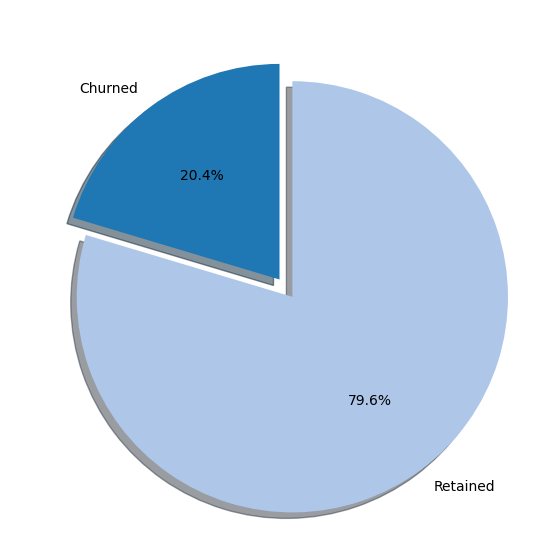

In [ ]:
labels = 'Churned', 'Retained'
sizes = [df_cp.churn[df_cp['churn']==1].count(), df_cp.churn[df_cp['churn']==0].count()]
explode = (0, 0.1)
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, textprops={'fontsize': 10}, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.show()

### **Histogramas**

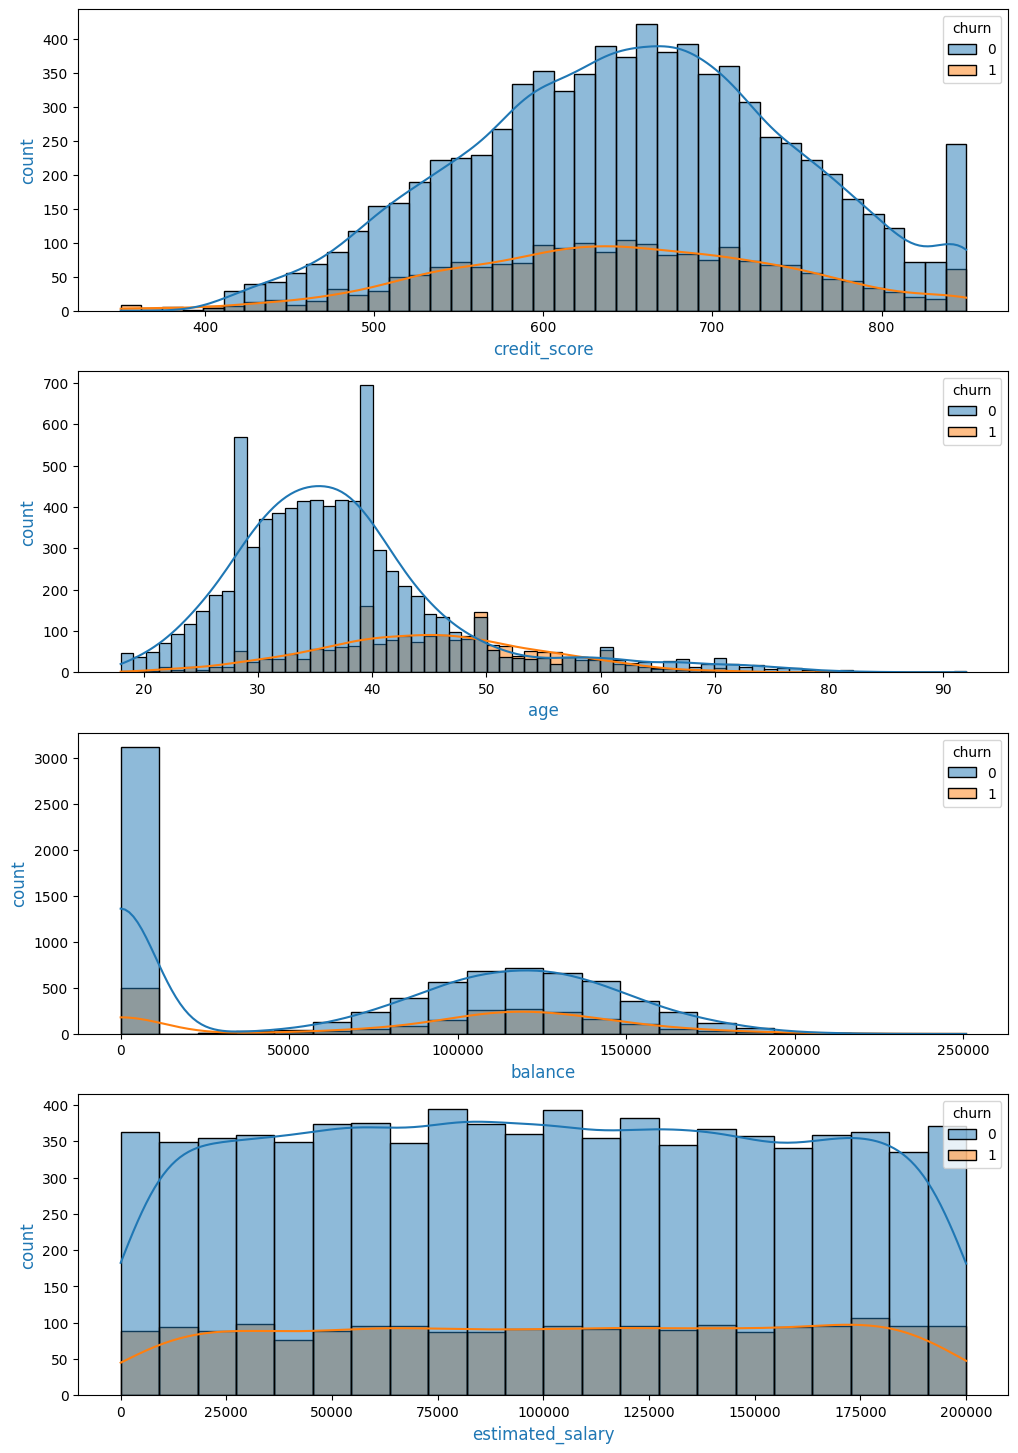

In [ ]:
plt.figure(figsize=(12,18))

plt.subplot(4,1,1)
sns.histplot(df_cp, x='credit_score', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('credit_score', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.subplot(4,1,2)
sns.histplot(df_cp, x='age', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('age', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.subplot(4,1,3)
sns.histplot(df_cp, x='balance', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('balance', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.subplot(4,1,4)
sns.histplot(df_cp, x='estimated_salary', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('estimated_salary', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
plt.show()

### **Grafico de Barras**

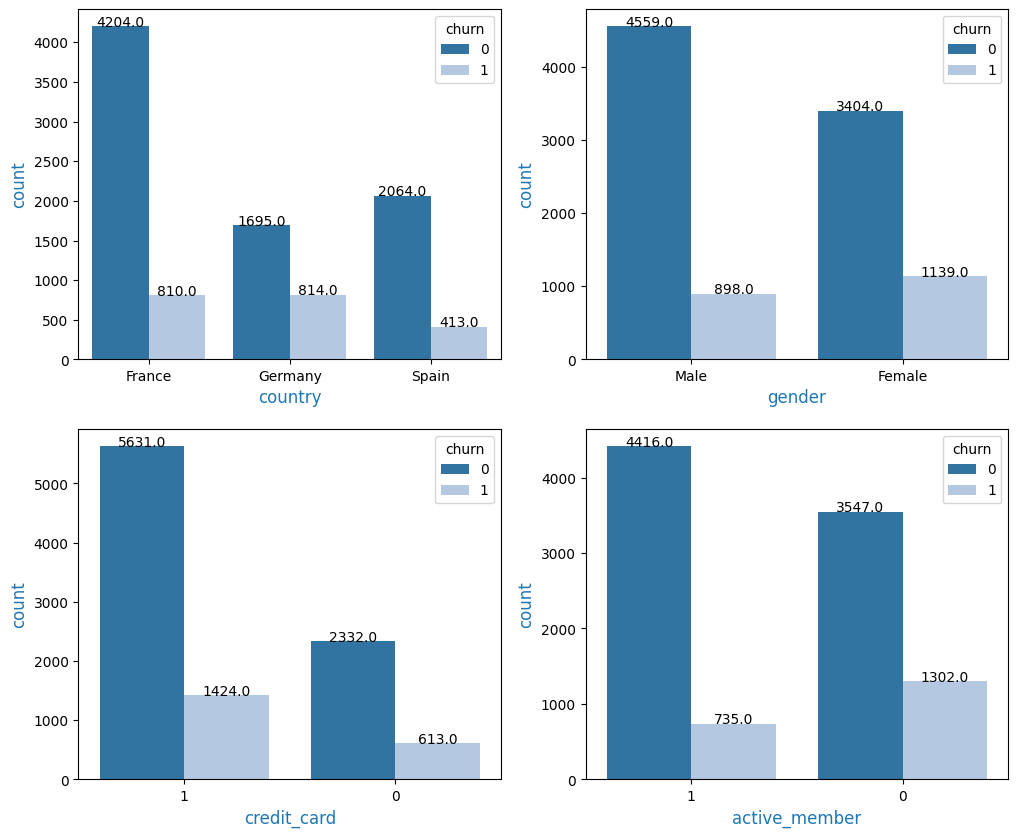

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
cplot = sns.countplot(data=df_cp, x='country', hue='churn', order=df_cp['country'].value_counts().index, palette=colors)
plt.xlabel('country', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.subplot(2,2,2)
cplot = sns.countplot(data=df_cp, x='gender', hue='churn', order=df_cp['gender'].value_counts().index, palette=colors)
plt.xlabel('gender', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.subplot(2,2,3)
cplot = sns.countplot(data=df_cp, x='credit_card', hue='churn', order=df_cp['credit_card'].value_counts().index, palette=colors)
plt.xlabel('credit_card', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.subplot(2,2,4)
cplot = sns.countplot(data=df_cp, x='active_member', hue='churn', order=df_cp['active_member'].value_counts().index, palette=colors)
plt.xlabel('active_member', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.show()

- Alemania tiene el mayor número de churns.
- Los churns femeninos son mayores a los churns masculinos.
- La mayoría de los que hicieron churn no son miembros activos.

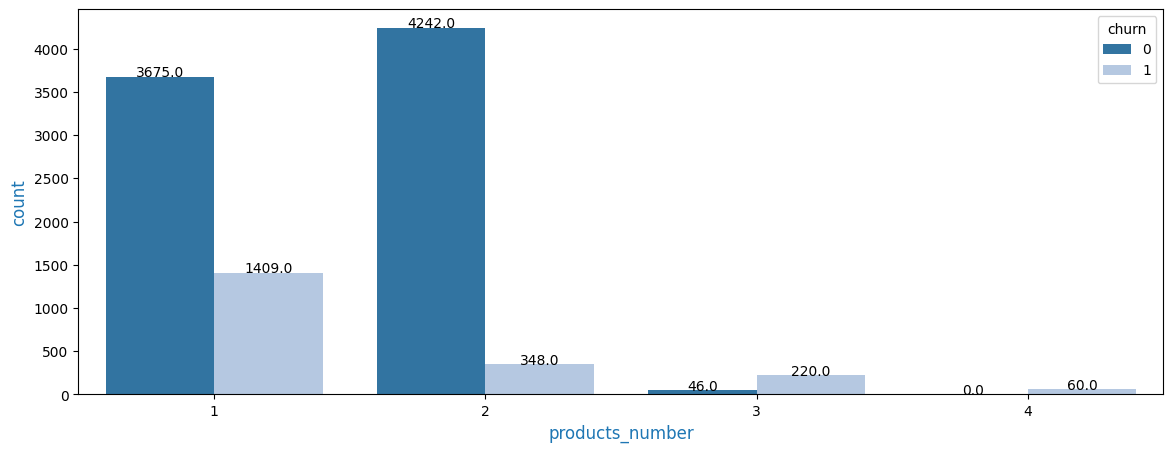

In [ ]:
plt.figure(figsize=(14,5))

cplot = sns.countplot(data=df_cp, x='products_number', hue='churn', palette=colors)
plt.xlabel('products_number', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.show()

- La mayoría de los clientes tienen sólo 1 o 2 productos.
- La mayoría de los que no hicieron churn tienen 2 productos.
- La mayoría de los que hicieron churn tienen 1 producto.
- Los clientes que tienen 3,4 productos son en su mayoría clientes que hicieron churn.

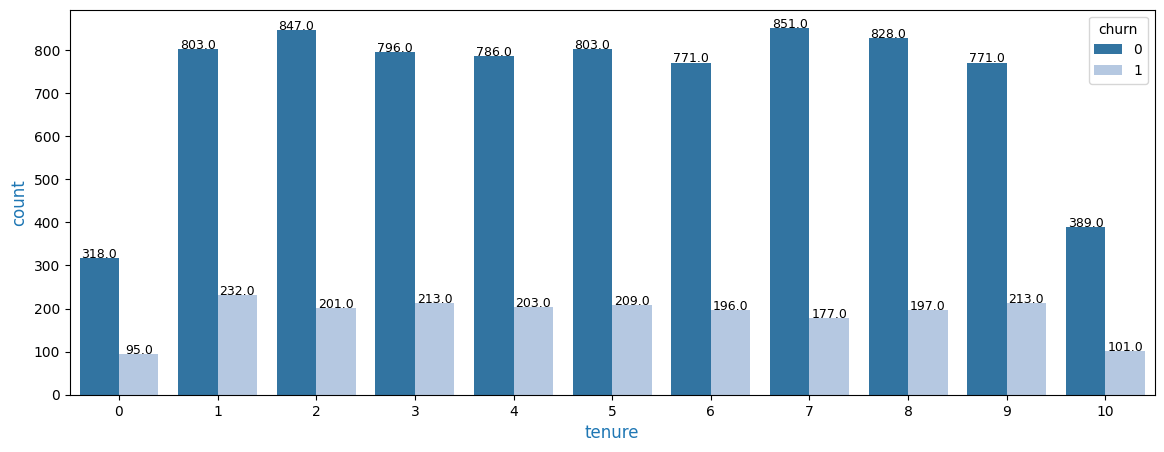

In [ ]:
plt.figure(figsize=(14,5))

cplot = sns.countplot(data=df_cp, x='tenure', hue='churn', palette=colors)
plt.xlabel('tenure', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 9)

plt.show()

- La mayoría de los clientes que hicieron churn tienen una antigüedad de 1 año.
- Comparativamente pocos clientes tienen una antigüedad de 0 o 10 años.

### **Grafico de dispersion**

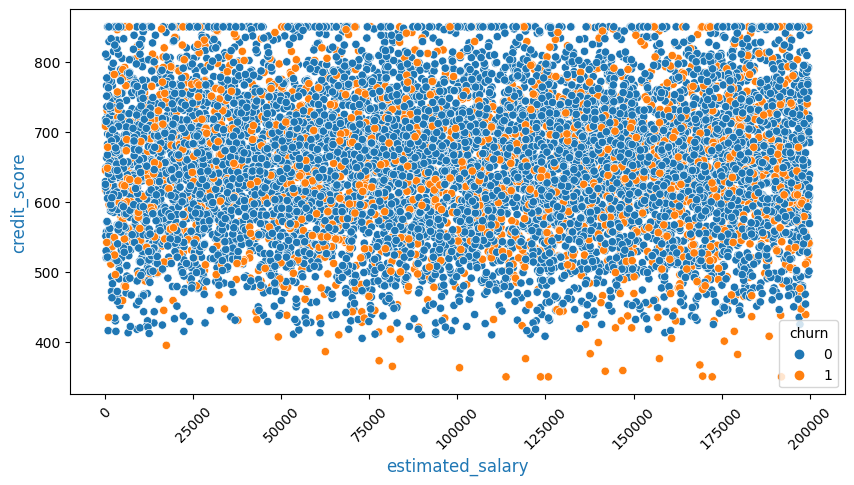

In [ ]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=df_cp, x='estimated_salary', y='credit_score', hue='churn', palette=[colors[0], colors[2]])
plt.xlabel('estimated_salary', fontsize=12, color=colors[0])
plt.ylabel('credit_score', fontsize=12, color=colors[0])
plt.xticks(rotation=45)

plt.show()

- Las clientes con puntuación de crédito <400 son en su mayoría clientes que hiceron churn.

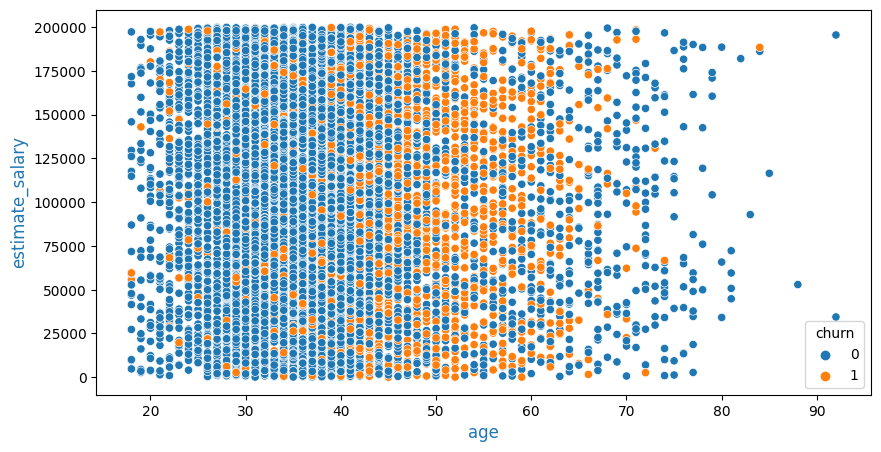

In [ ]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=df_cp, x='age', y='estimated_salary', hue='churn', palette=[colors[0], colors[2]])
plt.xlabel('age', fontsize=12, color=colors[0])
plt.ylabel('estimate_salary', fontsize=12, color=colors[0])

plt.show()

- La mayoría de los clientes que hicieron churn se encuentran en el grupo de edad de 50 a 60 años.

# **Data preprocessing**

## **Label Encoding**

In [ ]:
dfEnc=df_cp.copy()

In [ ]:
# Encoding 'gender', 'country'
dfEnc["gender"] = LabelEncoder().fit_transform(dfEnc["gender"])
dfEnc["country"] = LabelEncoder().fit_transform(dfEnc["country"])

In [ ]:
dfEnc.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## **Separacion de Variables**

In [ ]:
X=dfEnc.drop('churn',axis=1)
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y=dfEnc['churn']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

## **Handling imbalanced data**

In [ ]:
X_bal,Y_bal=SMOTEENN().fit_resample(X,Y)

In [ ]:
Y_bal.value_counts()

1    3669
0    2889
Name: churn, dtype: int64

## **Train-test split**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_bal,Y_bal,test_size=0.3)

## **Scaling features**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Modelos de Clasificacion**

###- **Regresión logística:** Es una técnica que predice la probabilidad de una variable binaria (dos resultados posibles) a partir de variables categóricas o discretas. Se basa en un modelo estadístico que utiliza una función logística para estudiar las relaciones entre las variables.

### - **Árbol de decisión**: Es un algoritmo de aprendizaje automático que crea un modelo de decisiones en forma de árbol. Cada nodo en el árbol representa una decisión, con ramas que representan posibles resultados. El modelo genera una predicción para una observación aplicando una secuencia de pruebas lógicas.

###- **SVC:** Es un algoritmo de aprendizaje automático que se utiliza para la clasificación y la regresión. Se basa en el concepto de encontrar un hiperplano que mejor divida el conjunto de datos en clases.

###- **KNeighbors:** Es un algoritmo de clasificación que utiliza el algoritmo KNN para clasificar los datos en diferentes categorías. El algoritmo encuentra los “k” vecinos más cercanos a un nuevo punto y los hace “votar” para clasificar bajo qué etiqueta se encuentra4.

###- **RandomForest:** Es un algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación, la regresión y otras tareas utilizando árboles de decisión. Crea un conjunto de árboles de decisión a partir de un subconjunto seleccionado aleatoriamente del conjunto de entrenamiento.

In [ ]:
classifiers = [LogisticRegression(), DecisionTreeClassifier(), svm.SVC(), KNeighborsClassifier(), RandomForestClassifier()]
classifier_names = ['Logistic Regression', 'Decision tree classifier', 'Support vector classifier', 'K neighbors classifier', 'Random forest classifier']

Logistic Regression:-



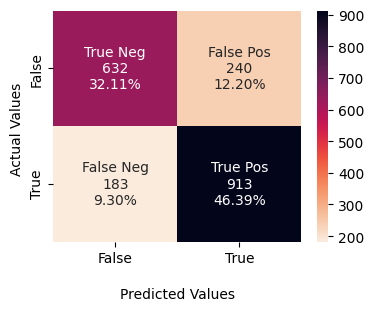



              precision    recall  f1-score   support

           0       0.78      0.72      0.75       872
           1       0.79      0.83      0.81      1096

    accuracy                           0.79      1968
   macro avg       0.78      0.78      0.78      1968
weighted avg       0.78      0.79      0.78      1968




Decision tree classifier:-



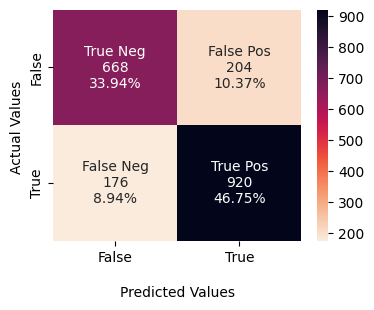



              precision    recall  f1-score   support

           0       0.79      0.77      0.78       872
           1       0.82      0.84      0.83      1096

    accuracy                           0.81      1968
   macro avg       0.80      0.80      0.80      1968
weighted avg       0.81      0.81      0.81      1968




Support vector classifier:-



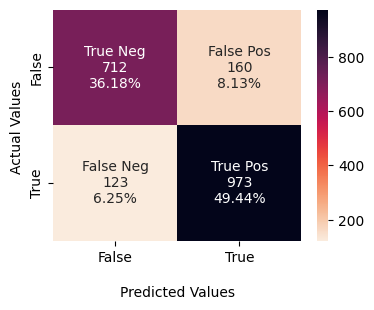



              precision    recall  f1-score   support

           0       0.85      0.82      0.83       872
           1       0.86      0.89      0.87      1096

    accuracy                           0.86      1968
   macro avg       0.86      0.85      0.85      1968
weighted avg       0.86      0.86      0.86      1968




K neighbors classifier:-



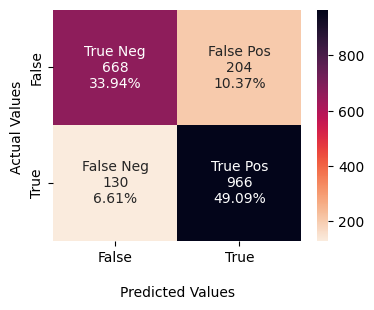



              precision    recall  f1-score   support

           0       0.84      0.77      0.80       872
           1       0.83      0.88      0.85      1096

    accuracy                           0.83      1968
   macro avg       0.83      0.82      0.83      1968
weighted avg       0.83      0.83      0.83      1968




Random forest classifier:-



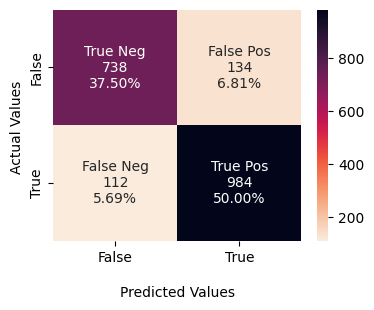



              precision    recall  f1-score   support

           0       0.87      0.85      0.86       872
           1       0.88      0.90      0.89      1096

    accuracy                           0.88      1968
   macro avg       0.87      0.87      0.87      1968
weighted avg       0.87      0.88      0.87      1968






In [ ]:
results = []
for i in range(len(classifiers)):
    model = classifiers[i]
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_pred)
    results.append([classifier_names[i], accuracy, precision, recall, f1, roc_auc])
    print(classifier_names[i] + ':-\n')
    cf_matrix = confusion_matrix(Y_test, Y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(4,3))
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap=c_map)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()
    print('\n')
    print(classification_report(Y_test,Y_pred))
    print('\n\n')

## **Performance**

In [ ]:
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC score'])
display(results_df)

,Classifier,Accuracy,Precision,Recall,F1 Score,ROC AUC score
0,Logistic Regression,0.785061,0.791847,0.833029,0.811916,0.778900
1,Decision tree classifier,0.806911,0.818505,0.839416,0.828829,0.802736
2,Support vector classifier,0.856199,0.858782,0.887774,0.873037,0.852144
3,K neighbors classifier,0.830285,0.825641,0.881387,0.852604,0.823721
4,Random forest classifier,0.875000,0.880143,0.897810,0.888889,0.872070


Se concluye que Random Forest es el mejor modelo para nuestro conjunto de datos.

# **Random Forest**

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 20)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
max_features = [None, 'sqrt', 'log2']
min_samples_split = [2, 3, 5, 7, 11]
min_samples_leaf = [1, 2, 3, 5, 7, 11]
criterion = ['gini', 'entropy', 'log_loss']

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

model = RandomForestClassifier()
rf_RandomGrid = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 5, n_jobs = -1)
rf_RandomGrid.fit(X_train, Y_train)
print("Best params: ", rf_RandomGrid.best_params_)

Best params:  {'n_estimators': 147, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 90, 'criterion': 'entropy'}


In [ ]:
final_rf = RandomForestClassifier(**rf_RandomGrid.best_params_)
final_model = final_rf.fit(X_train, Y_train)
Y_pred = final_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       872
           1       0.87      0.90      0.89      1096

    accuracy                           0.87      1968
   macro avg       0.87      0.87      0.87      1968
weighted avg       0.87      0.87      0.87      1968



## **Input**

In [ ]:
sample = [[600, 1, 0, 35, 3, 20000.00, 2, 0, 1, 200000.00]]
sample_df = pd.DataFrame(sample, columns=['credit_score', 'country', 'gender', 'age', 'tenure', 'balance'	,'products_number' ,'credit_card',	'active_member'	,'estimated_salary'])
print("Sample input:- \n")
display(sample_df)
print("\n\nPredicted value:- \n")
scaler = StandardScaler()
sample = scaler.fit_transform(sample)
final_model.predict(sample)

Sample input:- 



,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,600,1,0,35,3,20000.0,2,0,1,200000.0




Predicted value:- 



array([1])

## **Conlusion**
Según nuestro modelo, es probable que este cliente realice el churn.